In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

Load the dataset

In [7]:
# Load the house price dataset
df = pd.read_csv('/content/train.csv')

# Show shape and few rows
print("Shape of dataset: ", df.shape)
df.head()

Shape of dataset:  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Basic information and Null check

In [8]:
# Basic Structure
df.info()

# Count missing values per columns
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


Summary Statistics

In [9]:
# Statictical summary of numeric values
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Visualize the target table (SalePrice)

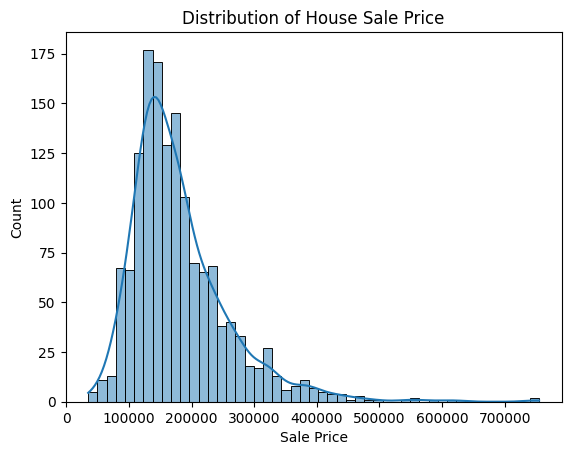

In [10]:
# Visual distribution of SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of House Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()

Correlations with SalePrice

In [11]:
# Calculate correlations
corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

# Show top 10 most correlated features
print("Top Correlated Features:\n")
print(corr[1:11]) # Skipping SalePrice itself

Top Correlated Features:

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Plot Correlation Heatmap

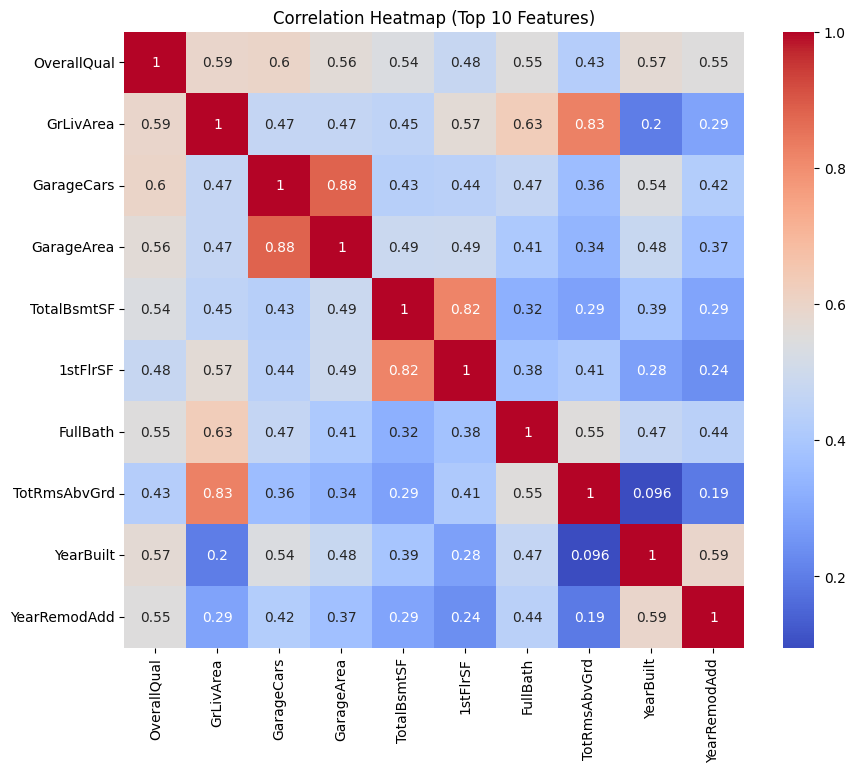

In [12]:
# Heatmap for top 10 features
top_features = corr[1:11].index # get feature names
plt.figure(figsize=(10 , 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Top 10 Features)")
plt.show()

Select top features based on correlation

In [13]:
# Select top features
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
            'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
            'YearBuilt', 'YearRemodAdd']

# Define input(x) and target(y)
x = df[features]
y = df['SalePrice']

Check for missing values in x

In [14]:
# check for missing values in selected features
print(x.isnull().sum())

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64


Train Test-Split

In [15]:
from sklearn.model_selection import train_test_split

# Split data into training and testing (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Scale the features

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data and transform both train and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Train a Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

# Initialize and train a model
ln_model = LinearRegression()
ln_model.fit(x_train_scaled, y_train)

# Predict on test set
ln_preds = ln_model.predict(x_test_scaled)

Train a Gradient Boosting Regressor

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_scaled, y_train)

# Predict on test set
gb_preds = gb_model.predict(x_test_scaled)

Evaluate both models

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Linear Regression Evaluation
lr_mae = mean_absolute_error(y_test, ln_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, ln_preds))

# Gradient Boosting Evaluation
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))

# Print results
print("Linear Regression:")
print(f"  MAE = {lr_mae:.2f}")
print(f"  RMSE = {lr_rmse:.2f}")

print("\nGradient Boosting Regression:")
print(f" MAE = {gb_mae:.2f}")
print(f" RMSE = {gb_rmse:.2f}")

Linear Regression:
  MAE = 24774.22
  RMSE = 39474.54

Gradient Boosting Regression:
 MAE = 47222.59
 RMSE = 72520.47


Plot Actual vs Predicted Prices

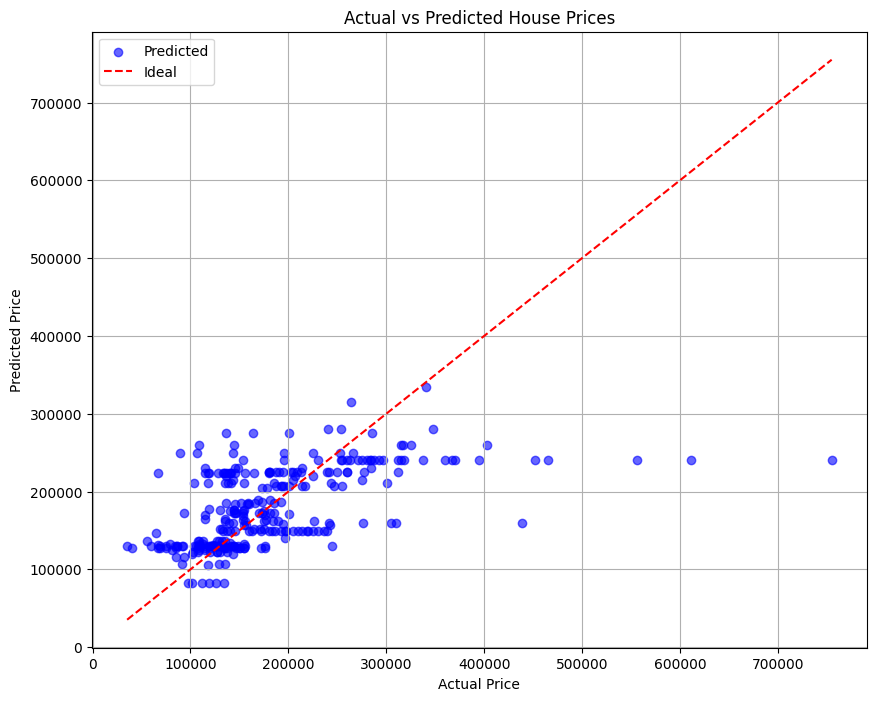

In [24]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted prices
plt.figure(figsize=(10, 8))
plt.scatter(y_test, gb_preds, alpha = 0.6, color='blue', label= 'Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label = 'Ideal')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

Get Feature Importance from Gradient Boosting Model

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': gb_model.feature_importances_
}).sort_values(by= 'Importance', ascending=False)

# Display
print(feature_importance)

        Feature  Importance
4   TotalBsmtSF    0.199873
5      1stFlrSF    0.187274
1     GrLivArea    0.173738
3    GarageArea    0.169516
8     YearBuilt    0.087737
9  YearRemodAdd    0.077076
0   OverallQual    0.050034
7  TotRmsAbvGrd    0.035448
6      FullBath    0.010274
2    GarageCars    0.009031


Plot Feature Importance (Gradient Boosting Regressor)

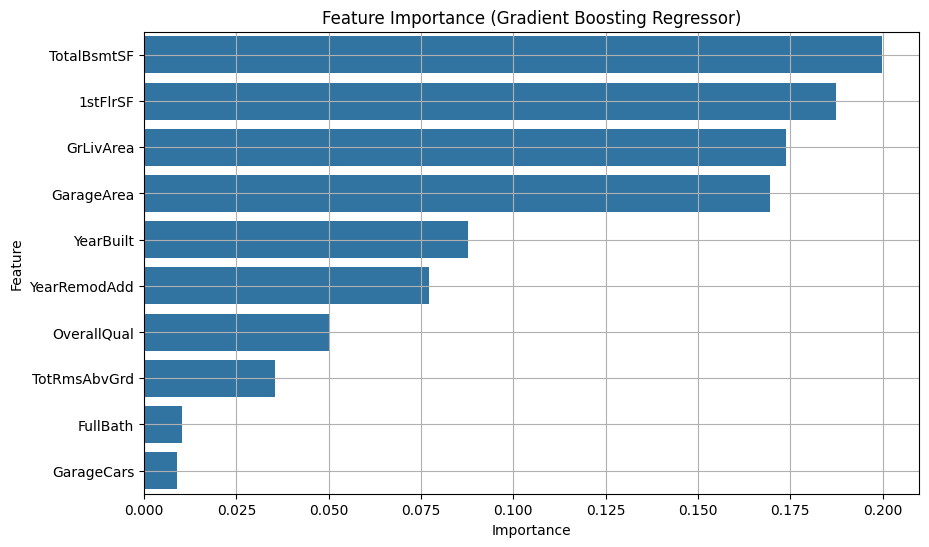

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance)
plt.title("Feature Importance (Gradient Boosting Regressor)")
plt.grid(True)
plt.show()